In [60]:
import pandas as pd
from sklearn import datasets
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Importing IRIS Dataset 

In [3]:
df=pd.read_csv(r'C:\Users\chat2\Downloads\Iris.csv')
df1=df.copy()

In [90]:
df.shape
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Implementing a custom Kfold Cross Validation Algorithm:
	1. Shuffle the dataset initially
	2. use array_split() to split the data into k equal parts
	3. append each folds (splits) to a list
	4. split train and test data from each fold
		4.1.1. Include the first fold data in loop as test dataset
		4.1.2 Append the rest fold data together provided the test data is not included
		4.1.2 Append the rest fold data together provided the test data is not included
		4.1.3 Append the new dataset as Train dataset.
	5. Slice the dataset for predictor and Response variable respectively.


In [217]:

def kfold(input_dataframe,k):
    Datasets=[]
    
    input_dataframe1=input_dataframe.sample(frac=1)
    fold1,fold2,fold3,fold4,fold5=np.array_split(input_dataframe1,k)
    Datasets.append(fold1)
    Datasets.append(fold2)
    Datasets.append(fold3)
    Datasets.append(fold4)
    Datasets.append(fold5)
    return Datasets
    
splits=kfold(input_dataframe=df1,k=5)
train=[]
test=[]
for i in range(0,len(splits)):   
    test.append(splits[i])
    train.append(pd.DataFrame(np.concatenate(splits[:i]+splits[i+1:])))
train[0].iloc[:,1:5]
#print(train[0].iloc[:,1:5].shape)
#print(test[0].iloc[:,1:5].shape)


,1,2,3,4
0,5.8,2.7,3.9,1.2
1,6.9,3.1,4.9,1.5
2,6.5,3,5.2,2
3,5.5,3.5,1.3,0.2
4,5.9,3,4.2,1.5
...,...,...,...,...
115,5,3.4,1.6,0.4
116,6.4,2.8,5.6,2.1
117,6.6,2.9,4.6,1.3
118,7.9,3.8,6.4,2


## Implementing KNN
	 •	Once the Train and Test dataset is obtained for various folds, We tend to fit the KNN Model from sklearn and find the accuracy of each model for each Fold.
•	We find the Average of accuracy to determine the overall performance of the model. 
•	Average Accuracy of KNN Model from 5 different Folds – 0.9667


In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [220]:
knn={'KNN accuracy':[]}
acc_sum=0
k=5
for i in range(0,len(train)):
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train[i].iloc[:,1:5],train[i].iloc[:,-1:])
    predict_neigh=neigh.predict(test[i].iloc[:,1:5])
    acc=accuracy_score(test[i].iloc[:,-1:],predict_neigh)
    #print(predict_neigh)
    #print(test[i].iloc[:9,-1:])
    knn['KNN accuracy'].append(acc)
    acc_sum=acc+acc_sum
    
print(knn)
aggreagate_accuracy_knn=acc_sum/len(train)
print("Average KNN Accuracy: "+str(aggreagate_accuracy_knn))


{'KNN accuracy': [0.9333333333333333, 1.0, 0.9666666666666667, 0.9333333333333333, 1.0]}
Average KNN Accuracy: 0.9666666666666666


## Implementing Decssion Tree

•	Decision Tree model is fit on the various folds of data.
•	Sklearn DecisionTreeClassifier() is used for fitting model.
•	Average Accuracy of Decision Tree Model for various fold is 0.9466


In [222]:
DT={'DecissionTree accuracy':[]}
acc_sum_dt=0
for i in range(0,len(train)):
    
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(train[i].iloc[:,1:5],train[i].iloc[:,-1:])
    predict_tree=decision_tree.predict(test[i].iloc[:,1:5])
    acc_DT=accuracy_score(test[i].iloc[:,-1:],predict_tree)
#     print(predict_tree)
#     print(test[i].iloc[:9,-1:])
    DT['DecissionTree accuracy'].append(acc_DT)
    acc_sum_dt=acc_DT+acc_sum_dt
    
print(DT)
aggreagate_accuracy_dt=acc_sum_dt/len(train)

print("Average DecissionTree Accuracy: "+str(aggreagate_accuracy_dt))


{'DecissionTree accuracy': [0.9, 1.0, 0.9, 0.9333333333333333, 1.0]}
Average DecissionTree Accuracy: 0.9466666666666667


In [223]:
knn_diff={}


for i in range(0,len(train)):
    g={}
    k=[]
    z=str(i)
    for j in range(1,10):
        y=str(j)
      
        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(train[i].iloc[:,1:5],train[i].iloc[:,-1:])
        predict_neigh=neigh.predict(test[i].iloc[:,1:5])
        acc=accuracy_score(test[i].iloc[:,-1:],predict_neigh)
        #print(predict_neigh)
        #print(test[i].iloc[:9,-1:])
        k.append(acc)
        g[y]=(k)
    knn_diff[z]=g

print(knn_diff)

{'0': {'1': [0.9333333333333333, 0.9, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667], '2': [0.9333333333333333, 0.9, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667], '3': [0.9333333333333333, 0.9, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667], '4': [0.9333333333333333, 0.9, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667], '5': [0.9333333333333333, 0.9, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667], '6': [0.9333333333333333, 0.9, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667], '7': [0.9333333333333333, 0.9, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667],

## 3.EFFECT OF K on ACCURACY:
1.	We tend to determine the various accuracy for different K values.
2.	Each fold must be tested for each K value
3.	Run a For loop for each fold
4.	Run an inside for loop for each value of K
5.	We obtain a lists of list which contains Each folds and accuracy for each K value ranging from 1 to 15.
6.	We group and sum each accuracy based on the K value for different folds
7.	For E.g.: adding up K value=1 for Fold1, Fold2,Fold3,Fold4,Fold5 and taking an average.
8.	We finally arrive average accuracy for each K value ranging from 1-15 grouped Folds.



In [226]:
import warnings
warnings.filterwarnings('ignore')
knn_diff=[]

k_value=16
for i in range(0,len(train)):
    g=[]
    k=[]
    z=str(i)
    
    for j in range(1,k_value):
        y=str(j)
        acc_sum_k=0
        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(train[i].iloc[:,1:5],train[i].iloc[:,-1:])
        predict_neigh=neigh.predict(test[i].iloc[:,1:5])
        acc=accuracy_score(test[i].iloc[:,-1:],predict_neigh)
        #print(predict_neigh)
        #print(test[i].iloc[:9,-1:])
        
        k.append(acc)
   
    knn_diff.append(k)
#print(knn_diff)

sum_k = np.sum(knn_diff,0)

avg_k=sum_k/len(knn_diff)

print(avg_k)

[0.94666667 0.93333333 0.97333333 0.96       0.96666667 0.97333333
 0.98       0.98       0.98       0.98666667 0.97333333 0.98
 0.98       0.98666667 0.98      ]


## 3. EVALUATING IMPACT OF K ON ACCURACY

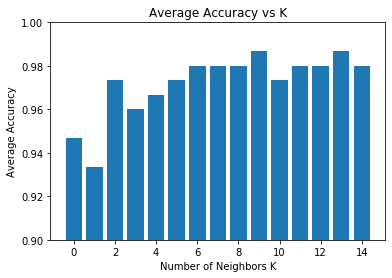

In [231]:
import matplotlib.pyplot as plt
plt.bar([y for y in range(k_value-1)], avg_k)
plt.ylim([0.9,1])
plt.xlabel("Number of Neighbors K")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy vs K")
plt.show()

## Maximum K value

In [233]:
print(avg_k.max())
max=np.argmax(avg_k)
max


0.9866666666666667


9

## 4. COMPARISON OF KNN AND DECISSION TREE

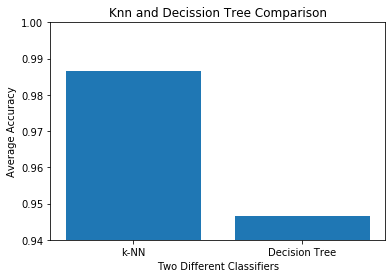

In [236]:

obj = ('k-NN', 'Decision Tree')
ypos=np.arange(len(obj))
plt.bar(np.arange(2), [avg_k[9],aggreagate_accuracy_dt])
plt.ylim([0.94,1])
plt.xlabel("Two Different Classifiers")
plt.ylabel("Average Accuracy")
plt.title("Knn and Decission Tree Comparison")
plt.xticks(ypos, obj)
plt.show()